In [1]:
import os
import pandas as pd
import numpy as np
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


from google.colab import drive

data_dir = '/content/content/MyDrive/data'

drive.mount('content')
os.chdir(data_dir)
os.listdir()

Mounted at content


['train.csv',
 'feature_details_analysis.xlsx',
 'data_description.txt',
 'feature_classification.csv',
 'train_refined - Copy.csv',
 'feature_classification - Copy.csv',
 'train_refined.csv',
 'train_refined - Copy (2).csv',
 'train_refined_numeric.csv',
 'titanic']

# __Unbalanced data problem__
- Skewed datasets can lead to misleading metrics, such as accuracy, in critical classification tasks.  
- Accuracy alone fails to capture the model's performance for minority classes in imbalanced data.  
- Synthetic datasets, created using Scikit-learn, allow experimentation with highly imbalanced data scenarios.  
- The `make_classification` function customizes datasets to simulate real-world feature distributions and noise.  
- Confusion matrices provide detailed insights, capturing performance across both majority and minority classes.  

In [2]:
# Generate synthetic dataset
X, y = make_classification(
    n_samples=1000,       # Total number of samples
    n_features=10,        # Number of features
    n_informative=5,      # Number of informative features
    n_redundant=2,        # Number of redundant features
    n_classes=2,          # Binary classification (0 and 1)
    weights=[0.95, 0.05], # 95% negative class, 5% positive class (highly imbalanced)
    random_state=42       # Ensures reproducibility
)

# Convert to a DataFrame
df = pd.DataFrame(X, columns=[f"Feature_{i}" for i in range(1, 11)])
df['Target'] = y

# Display class distribution
print(df['Target'].value_counts())
df.head()

Target
0    946
1     54
Name: count, dtype: int64


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Target
0,1.108936,1.540492,0.493516,-0.529740,0.982175,1.177544,1.623025,1.357325,0.966041,-0.504924,0
1,-0.564641,3.638629,-1.522415,-1.541705,1.616697,4.781310,3.190292,-0.890254,1.438826,-3.828748,0
2,0.516313,2.165426,-0.628486,-0.386923,0.492518,1.442381,1.332905,-1.958175,-0.348803,-1.804124,0
3,1.476534,0.548523,-0.115420,-0.875408,1.301216,0.410295,1.171878,-1.034471,-1.654176,1.344601,0
4,0.278385,1.065828,-1.724917,-2.235667,0.715107,0.731249,-0.674119,0.598330,-0.524283,1.047610,0


In [ ]:
df['Target'].value_counts()

In [3]:
model = LogisticRegression(max_iter=1000)  # Set max_iter during initialization
model.fit(X, y)  # Fit the model with features (X) and target (y)

y_pred = model.predict(X)

In [4]:
accuracy_score(y, y_pred)

0.952

In [5]:
y[y==1]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [6]:
y_pred[y_pred==1]

array([1, 1, 1, 1, 1, 1, 1, 1])

# __Confusion matrix__
- Confusion matrix helps evaluate model performance by analyzing predictions for unlabeled data.  
- It categorizes predictions into true positives, true negatives, false positives, and false negatives.  
- Scikit-learn's tools compute and display the confusion matrix for effective evaluation and visualization.  
- The matrix reflects actual values versus predicted outcomes across different classes.  
- It highlights areas where the model succeeds and struggles, especially with imbalanced predictions.  
- Metrics like precision, recall, and F1 score derived from the matrix assess classification accuracy.  
- This technique improves model reliability and decision-making for handling unlabeled datasets effectively.  

$$
{Predicted\ Values}
$$
$$
{Actual\ Values}
\begin{array}{|c|c|}
\hline
\boxed{\mathbf{\text{True Negatives (TN)}}} & \text{False Positives (FP)} \\ \hline
\text{False Negatives (FN)} & \boxed{\mathbf{\text{True Positives (TP)}}} \\ \hline
\end{array}
\qquad\\
$$

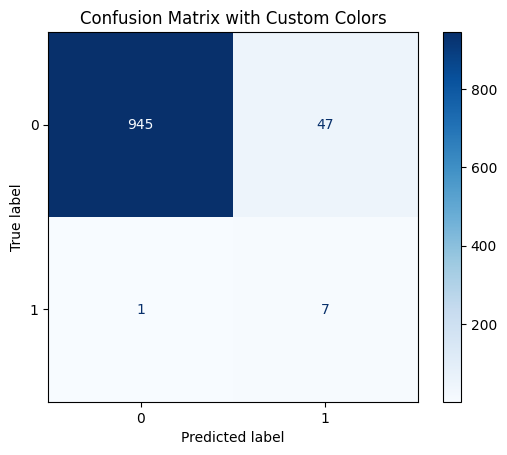

In [7]:
# Assuming 'y_pred' and 'y' are already defined and confusion matrix is created:
cm = confusion_matrix(y_pred, y)

# Create the display with a custom colormap
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')  # Change 'Blues' to any other colormap like 'viridis', 'cividis', etc.

plt.title('Confusion Matrix with Custom Colors')
plt.show()


# __Precision, Recall and F1-Score__
- Precision measures the proportion of positive predictions that are actually correct and reliable.  
  - $
\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
$
- Recall evaluates the proportion of actual positive instances that the model successfully identifies.  
  - $
\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
$
- High precision and recall indicate good performance but are challenging with imbalanced datasets.  
- F1 score combines precision and recall, ensuring balance for comprehensive model evaluation.  
  - $
F1 \, \text{Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$

- Scikit-learn provides `precision_score`, `recall_score`, and `f1_score` functions to calculate these metrics easily.  

In [8]:
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f'{precision = }, {recall = :.3f}, {f1 = :.3f}')

precision = 0.875, recall = 0.130, f1 = 0.226


# __Classificatino reprot__
- Scikit-learn's classification report summarizes metrics like precision, recall, F1 score, and support.  
- It provides insights into a model’s strengths and weaknesses for each class in the dataset.  
- Class 0 achieves high precision (0.95), recall (1.00), and F1 score (0.98), reflecting strong performance.  
- Class 1 shows low recall (0.13) and F1 score (0.23), exposing struggles with minority class predictions.  
- Addressing class imbalance is critical for improving model generalization and handling minority classes effectively.  


In [10]:
print(classification_report(y, y_pred))


              precision    recall  f1-score   support

           0       0.95      1.00      0.98       946
           1       0.88      0.13      0.23        54

    accuracy                           0.95      1000
   macro avg       0.91      0.56      0.60      1000
weighted avg       0.95      0.95      0.93      1000

